# <h1><center>EDA</center></h1>
---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [9]:
# !pip install imblearn

In [10]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

In [11]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [12]:
df.drop(['neo_id','name','orbiting_body'], axis=1, inplace=True)

In [13]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


In [15]:
df.duplicated().sum()

5

In [16]:
df.drop_duplicates(inplace=True)

## <h2><center>Fill Null Value </center></h2>
---

In [23]:
df.isna().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [17]:
def fill_null_value(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
    else:
      df[col].fillna(df[col].median(), inplace=True)

  return df

In [18]:
df = fill_null_value(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338194 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338194 non-null  float64
 1   estimated_diameter_min  338194 non-null  float64
 2   estimated_diameter_max  338194 non-null  float64
 3   relative_velocity       338194 non-null  float64
 4   miss_distance           338194 non-null  float64
 5   is_hazardous            338194 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 15.8 MB


In [20]:
df.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338194.000000,338194.000000,338194.000000,338194.000000,3.381940e+05
mean,22.932574,0.157801,0.352853,51060.113126,4.153521e+07
std,2.911076,0.313873,0.701842,26399.035507,2.077401e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30711.844826,2.494480e+07
50%,22.800000,0.073207,0.163697,47560.146859,4.332674e+07
75%,25.100000,0.189041,0.422708,66672.950081,5.933949e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [21]:
df.isnull().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

## <h2><center>Find The Outlier</center></h2>
---

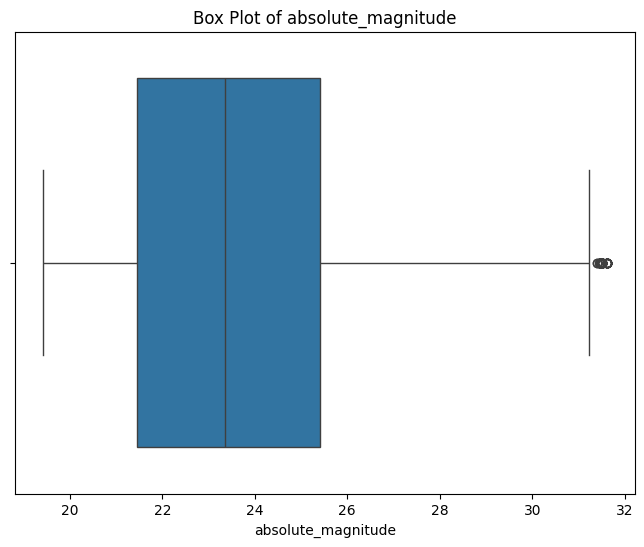

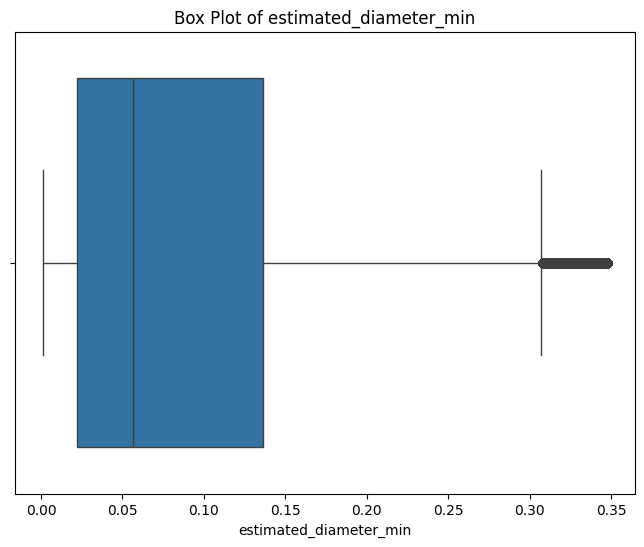

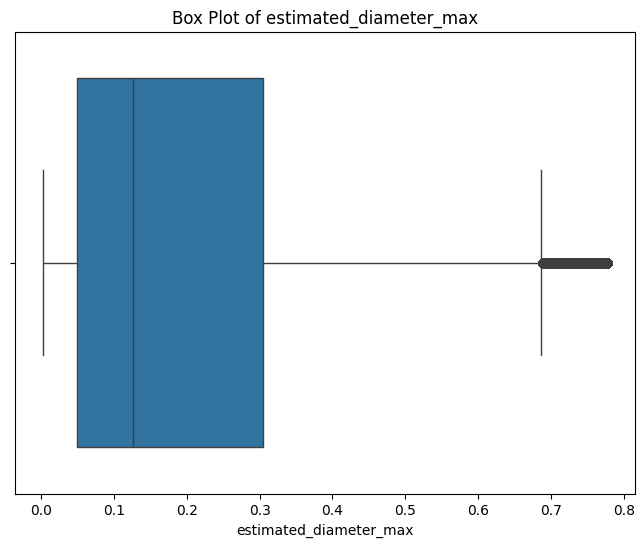

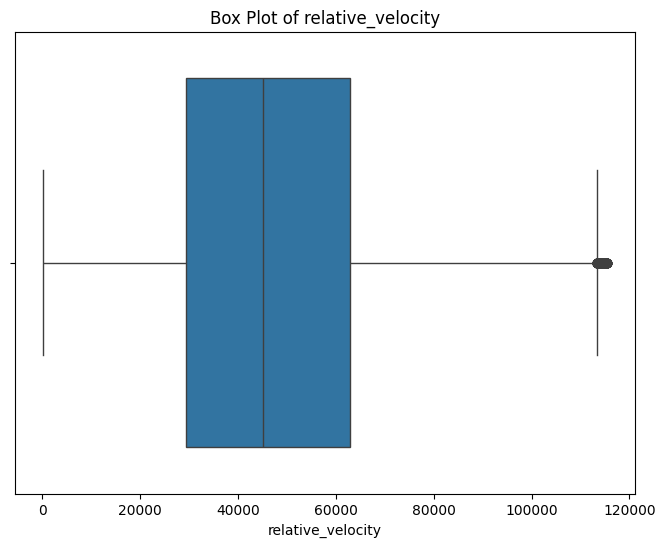

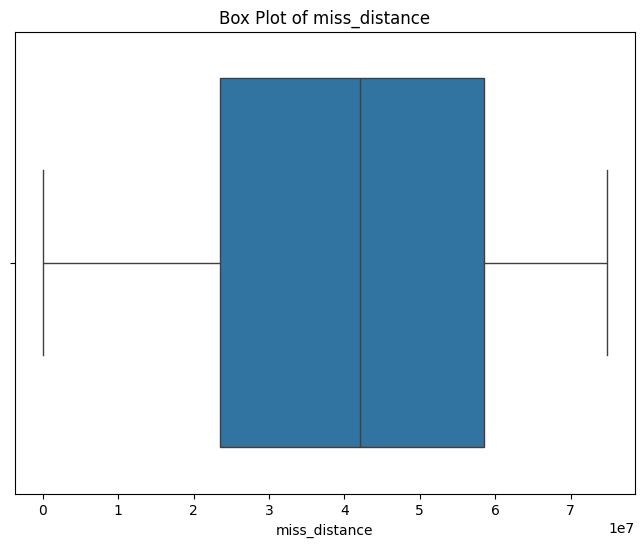

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])  # Box plot with seaborn
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [34]:
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df


In [35]:
for col in df.select_dtypes(include=np.number).columns:
  df = handle_outliers(df, col)

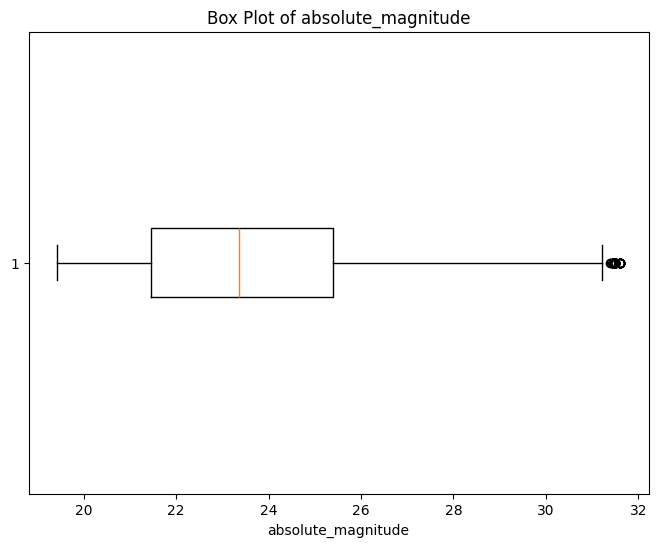

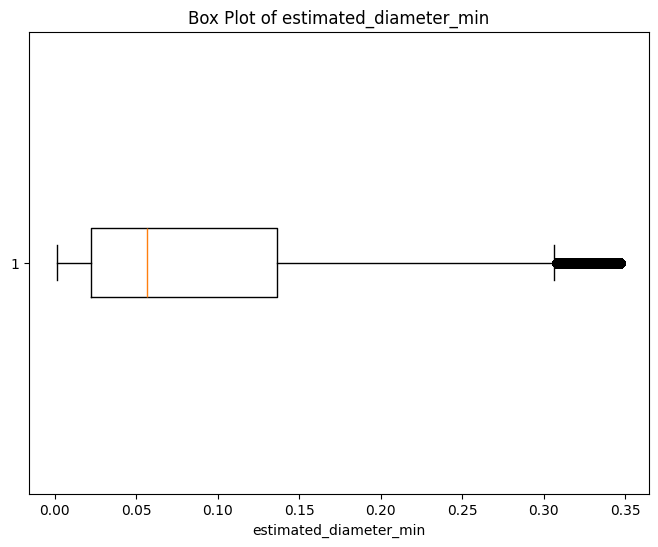

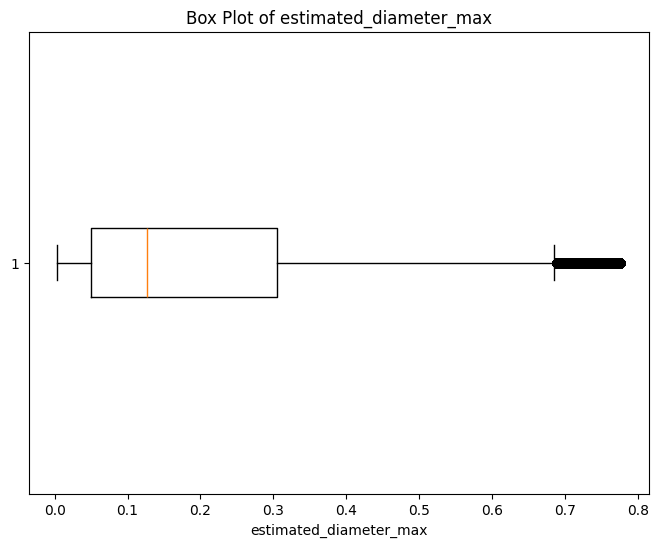

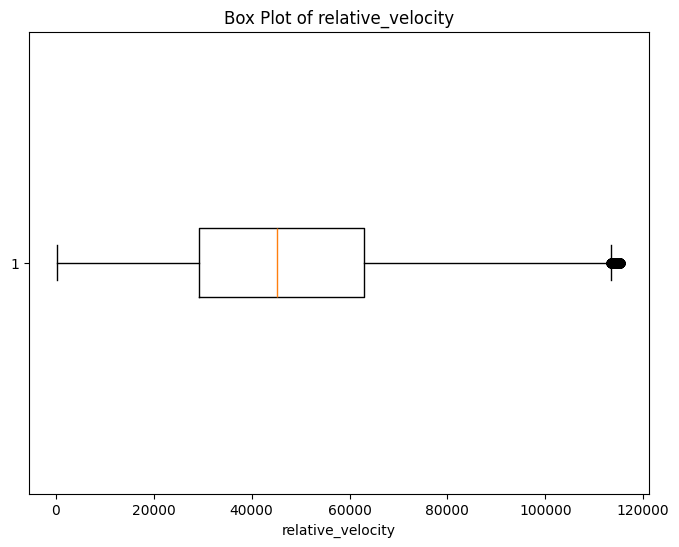

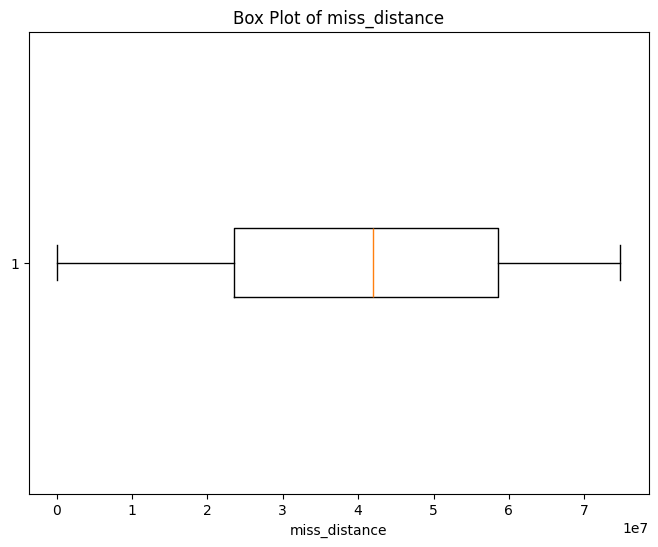

In [37]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe and numpy is imported as np
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col].dropna(), vert=False)  # Drop NaN values to avoid errors
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


## <h2><center>Visilization</center></h2>
---

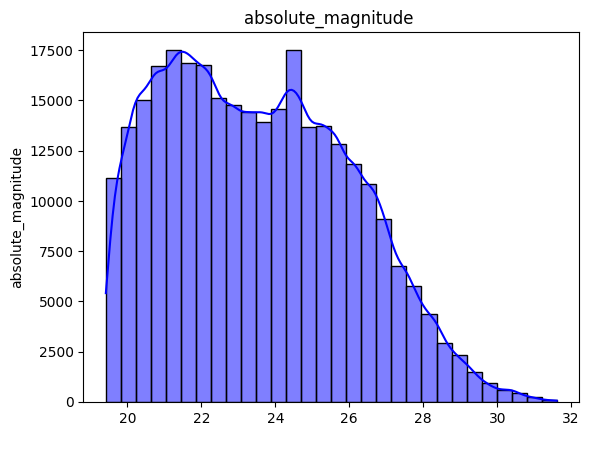

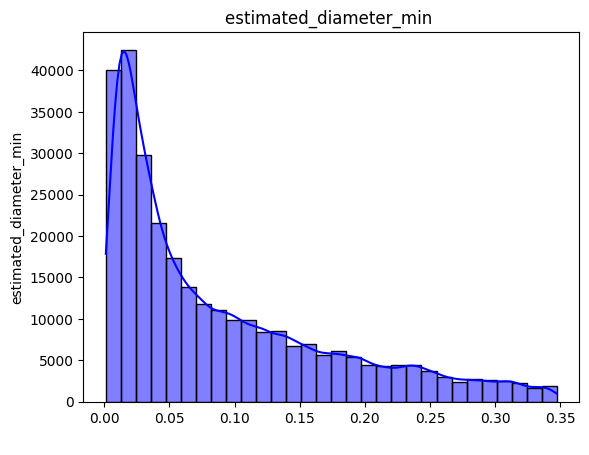

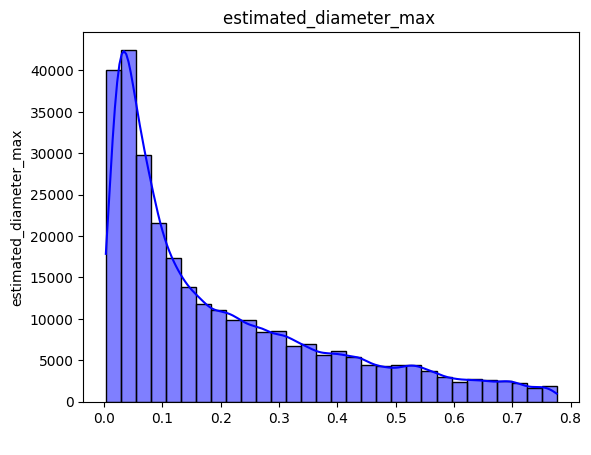

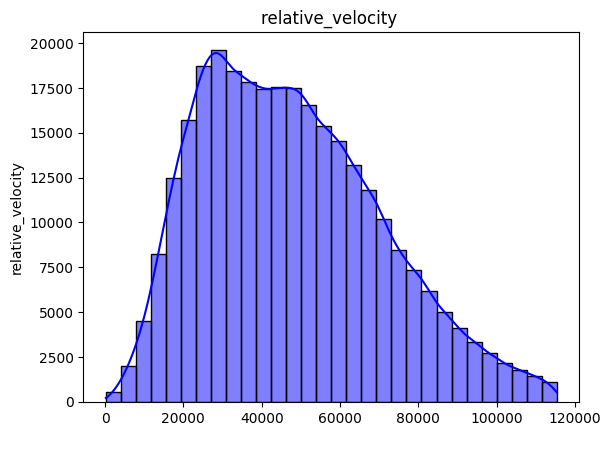

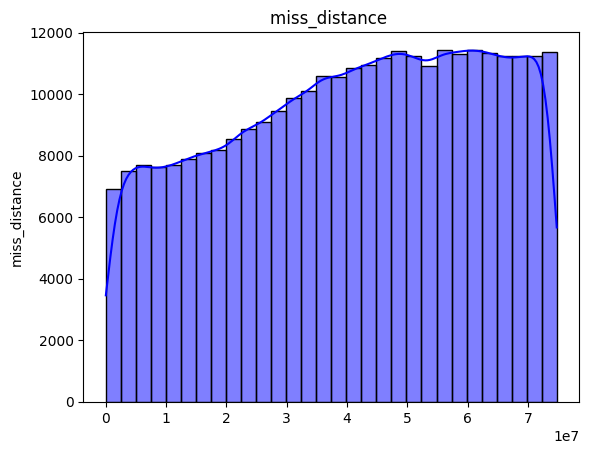

In [40]:
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
    plt.show()


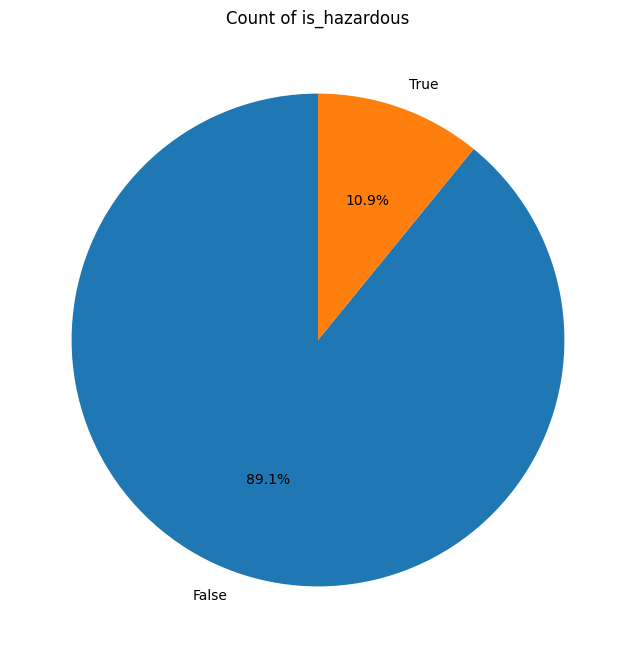

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Count the values of 'is_hazardous'
hazardous_counts = df['is_hazardous'].value_counts()

# Create the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Count of is_hazardous')
plt.show()


## <h2><center>Handle Imbalanced Data</center></h2>
---

In [43]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [44]:
somte = SMOTE(random_state=40)

X, y = somte.fit_resample(X, y)

y.value_counts()

is_hazardous
False    263607
True     263607
Name: count, dtype: int64

In [45]:
y

0         False
1         False
2         False
3         False
4          True
          ...  
527209     True
527210     True
527211     True
527212     True
527213     True
Name: is_hazardous, Length: 527214, dtype: bool

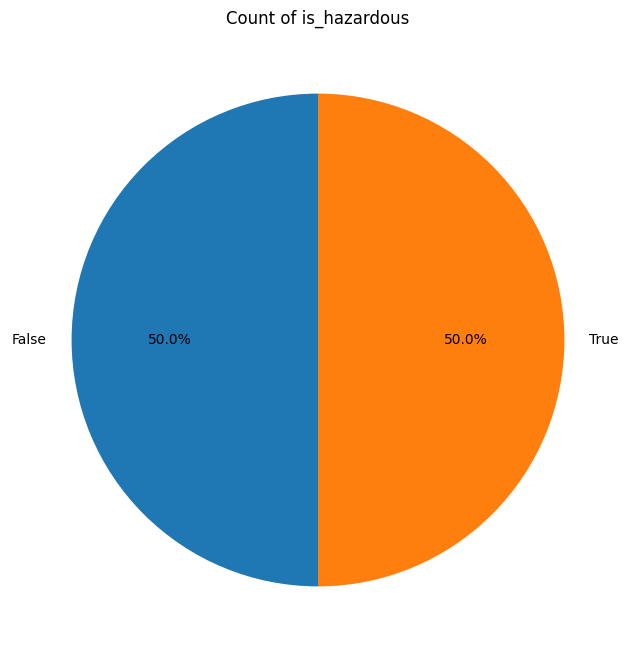

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

hazardous_counts = y.value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Count of is_hazardous')
plt.show()


## <h2><center>Models</center></h2>
---

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### <h3><center>Random Forest</center></h3>
---

In [51]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
RF_model_pred = RF_model.predict(x_test)

In [53]:
print(classification_report(y_test, RF_model_pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96     52674
        True       0.96      0.95      0.96     52769

    accuracy                           0.96    105443
   macro avg       0.96      0.96      0.96    105443
weighted avg       0.96      0.96      0.96    105443



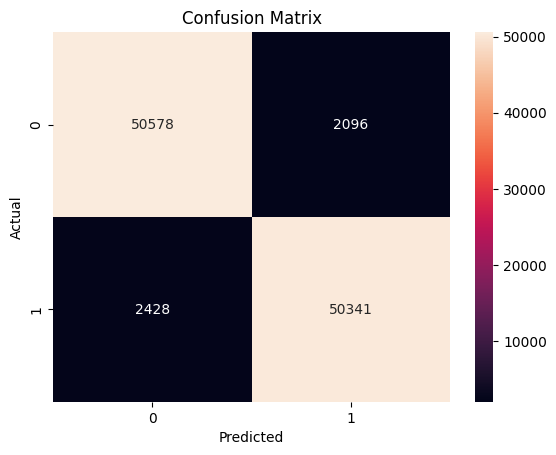

In [54]:
cm = confusion_matrix(y_test, RF_model_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### <h3><center>XGBoost</center></h3>
---

In [55]:
XG_model = XGBClassifier()
XG_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
XG_model_pred = XG_model.predict(x_test)

In [57]:
print(classification_report(y_test, XG_model_pred))

              precision    recall  f1-score   support

       False       0.96      0.82      0.88     52674
        True       0.84      0.97      0.90     52769

    accuracy                           0.89    105443
   macro avg       0.90      0.89      0.89    105443
weighted avg       0.90      0.89      0.89    105443



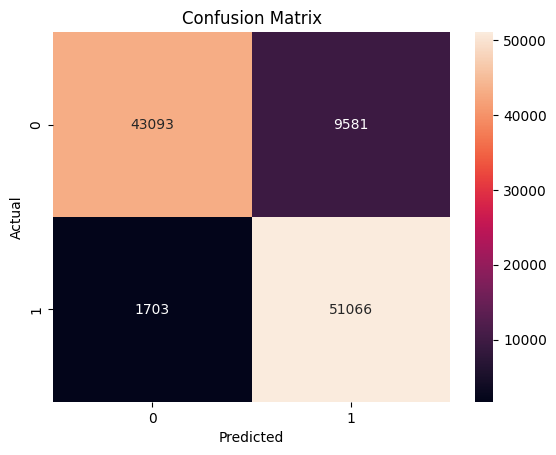

In [58]:
cm = confusion_matrix(y_test, XG_model_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## <h2><center>Evaluation</center></h2>
---

In [59]:
score_RF = accuracy_score(y_test, RF_model_pred)
score_XG = accuracy_score(y_test, XG_model_pred)
print("Random Forest Accuracy:", score_RF)
print("XGBoost Accuracy:", score_XG)


Random Forest Accuracy: 0.9570953026753791
XGBoost Accuracy: 0.8929848354087042


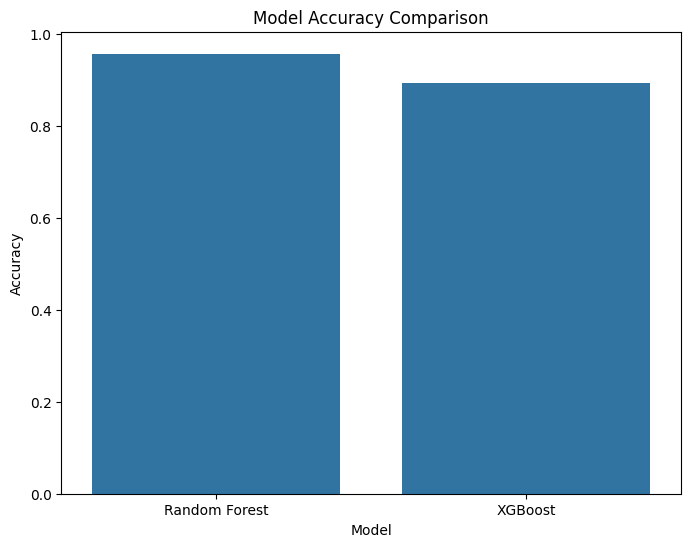

In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the model names and their corresponding accuracy scores
data = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [score_RF, score_XG]
})

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=data)

# Add title and axis labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


In [62]:
import pickle
filename = 'RF_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))


In [63]:
loaded_model = pickle.load(open('RF_model.sav', 'rb'))
result = loaded_model.predict(x_test)
print(result)

[ True False  True ...  True  True  True]


In [64]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96     52674
        True       0.96      0.95      0.96     52769

    accuracy                           0.96    105443
   macro avg       0.96      0.96      0.96    105443
weighted avg       0.96      0.96      0.96    105443

